In [46]:
# import packages
import numpy as np # NumPy is a Python package that stands for ‘Numerical Python’. It is the core library for scientific computing
import pandas as pd # Pandas is used for data manipulation, analysis and cleaning.
import matplotlib.pyplot as plt # powerful plotting library for python that offers a varied spectrum of 1D, 2D, and 3D visualizations. 
from IPython.display import display, HTML, display_html # Display the HTML representation of an object.
import seaborn as sns # Seaborn is a data visualization library in Python based on matplotlib
import pandas_profiling
import sweetviz as sv

In [47]:
import warnings 
warnings.filterwarnings('ignore')

In [48]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
dataset = read_csv('kidney_disease.csv')# read csv

In [49]:
dataset # return top and bottom n (5 by default) rows of a data frame

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [50]:
dataset.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [51]:
dataset.tail()

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [52]:
dataset.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [53]:
dataset.shape # rows, columns

(400, 26)

In [54]:
display(dataset.iloc[:,:].isnull().any()) # which column has null values (missing values)

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [33]:
pandas_profiling.ProfileReport(dataset)

In [34]:
profile = dataset.profile_report(title = 'Pandas Profiling Report')
profile.to_file(output_file = "Pandas Profiling Report — kidney.html")

In [55]:
dataset['rbc'] = dataset['rbc'].astype('category')
dataset['pc'] = dataset['pc'].astype('category')
dataset['pcc'] = dataset['pcc'].astype('category')
dataset['ba'] = dataset['ba'].astype('category')
dataset['htn'] = dataset['htn'].astype('category')
dataset['dm'] = dataset['dm'].astype('category')
dataset['pcv'] = dataset['pcv'].astype('category')
dataset['wc'] = dataset['wc'].astype('category')
dataset['rc'] = dataset['rc'].astype('category')
dataset['cad'] = dataset['cad'].astype('category')
dataset['appet'] = dataset['appet'].astype('category')
dataset['pe'] = dataset['pe'].astype('category')
dataset['ane'] = dataset['ane'].astype('category')
dataset['classification'] = dataset['classification'].astype('category')
dataset.dtypes

id                   int64
age                float64
bp                 float64
sg                 float64
al                 float64
su                 float64
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv               category
wc                category
rc                category
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object

In [56]:
dataset['rbc'] = dataset['rbc'].cat.codes
dataset['pc'] = dataset['pc'].cat.codes
dataset['pcc'] = dataset['pcc'].cat.codes
dataset['ba'] = dataset['ba'].cat.codes
dataset['htn'] = dataset['htn'].cat.codes
dataset['dm'] = dataset['dm'].cat.codes
dataset['pcv'] = dataset['pcv'].astype('category')
dataset['wc'] = dataset['wc'].astype('category')
dataset['rc'] = dataset['rc'].astype('category')
dataset['cad'] = dataset['cad'].cat.codes
dataset['appet'] = dataset['appet'].cat.codes
dataset['pe'] = dataset['pe'].cat.codes
dataset['ane'] = dataset['ane'].cat.codes
dataset['classification'] = dataset['classification'].cat.codes

In [57]:
dataset['age'].fillna(dataset['age'].mean(), inplace = True)
dataset['bp'].fillna(dataset['bp'].mean(), inplace = True)
dataset['sg'].fillna(dataset['sg'].mean(), inplace = True)
dataset['al'].fillna(dataset['al'].mean(), inplace = True)
dataset['su'].fillna(dataset['su'].mean(), inplace = True)
dataset['rbc'].fillna(dataset['rbc'].median(), inplace = True)
dataset['pc'].fillna(dataset['pc'].median(), inplace = True)
dataset['pcc'].fillna(dataset['pcc'].median(), inplace = True)
dataset['ba'].fillna(dataset['ba'].median(), inplace = True)

In [58]:
dataset['bgr'].fillna(dataset['bgr'].mean(), inplace = True)
dataset['bu'].fillna(dataset['bu'].mean(), inplace = True)
dataset['sc'].fillna(dataset['sc'].mean(), inplace = True)
dataset['sod'].fillna(dataset['sod'].mean(), inplace = True)
dataset['pot'].fillna(dataset['pot'].mean(), inplace = True)
dataset['hemo'].fillna(dataset['hemo'].mean(), inplace = True)

dataset['htn'].fillna(dataset['htn'].mode(), inplace = True)
dataset['dm'].fillna(dataset['dm'].mode(), inplace = True)
dataset['cad'].fillna(dataset['cad'].mode(), inplace = True)
dataset['appet'].fillna(dataset['appet'].mode(), inplace = True)
dataset['pe'].fillna(dataset['pe'].mode(), inplace = True)
dataset['ane'].fillna(dataset['ane'].mode(), inplace = True)

In [59]:
display(dataset.iloc[:,:].isnull().any()) # which column has null values (missing values)

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv                True
wc                 True
rc                 True
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [60]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [63]:
dataset['pcv'].fillna(dataset['pcv'].mode(0), inplace = True)
dataset['wc'].fillna(dataset['wc'].mode(0), inplace = True)
dataset['rc'].fillna(dataset['rc'].mode(0), inplace = True)

In [64]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [65]:
dataset.to_csv("kidney_disease.csv", index = False)

In [66]:
dataset.drop(["pcv"], axis = 1, inplace = True)

In [67]:
dataset.to_csv("kidney_disease.csv", index = False)

In [68]:
dataset.shape

(400, 25)

In [69]:
dataset.drop(["wc"], axis = 1, inplace = True)

In [70]:
dataset.drop(["rc"], axis = 1, inplace = True)

In [71]:
dataset.to_csv("kidney_disease.csv", index = False)

In [72]:
dataset.shape

(400, 23)

In [84]:
nu = ['int16', 'int32','int64', 'float16', 'float32', 'float64']    # selecting only numerical features from the dataset
nu_features = list(dataset.select_dtypes(include=nu).columns)

In [85]:
outlier = dataset[nu_features]

In [86]:
sorted(outlier)

['age', 'al', 'bgr', 'bp', 'bu', 'hemo', 'id', 'pot', 'sc', 'sg', 'sod', 'su']

In [87]:
Q1 = dataset.quantile(0.25) 
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                199.500000
age                22.000000
bp                 10.000000
sg                  0.005000
al                  2.000000
su                  0.450142
rbc                 2.000000
pc                  1.000000
pcc                 0.000000
ba                  0.000000
bgr                49.000000
bu                 34.750000
sc                  2.172454
sod                 6.000000
pot                 0.800000
hemo                3.750000
htn                 1.000000
dm                  1.000000
cad                 0.000000
appet               0.000000
pe                  0.000000
ane                 0.000000
classification      2.000000
dtype: float64


In [88]:
outlier_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis = 1)]
print(outlier_out.shape)

(181, 23)


In [90]:
outlier_out.to_csv("kidney_disease.csv", index = False)

In [91]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
dataset = read_csv('kidney_disease.csv')# read csv

In [96]:
X1 = dataset.iloc[:,0:-1]
y1 = dataset.iloc[:,-1]

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X1)
scaler.transform(X1)

array([[0.        , 0.46835443, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.01002506, 0.50632911, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.04010025, 0.4556962 , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99498747, 0.01265823, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.99749373, 0.07594937, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.59493671, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [99]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=101) # splitting training and testing set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((144, 22), (144,), (37, 22), (37,))

In [104]:
selector = SelectKBest(score_func=f_regression, k=20)
new_data = selector.fit_transform(X_train, y_train)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [102]:
pd.set_option("display.max.columns", None) # max rows
dataset

id   age    bp     sg   al   su  rbc  pc  pcc  ba         bgr     bu  \
0      0  48.0  80.0  1.020  1.0  0.0   -1   1    0   0  121.000000   36.0   
1      4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.000000   26.0   
2     16  47.0  70.0  1.015  2.0  0.0   -1   1    0   0   99.000000   46.0   
3     36  76.0  70.0  1.015  1.0  0.0    1   1    0   0   92.000000   29.0   
4     38  69.0  80.0  1.020  3.0  0.0    0   1    0   0  148.036517  103.0   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..         ...    ...   
176  395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.000000   49.0   
177  396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.000000   31.0   
178  397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.000000   26.0   
179  398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.000000   50.0   
180  399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.000000   18.0   

      sc         sod       pot  hemo  htn  dm  cad  appet  pe  ane  \
0    1.2  137.528754  4.627244  15.4    1   4    1      0   0    0   
1    1.4  137.528754  4.627244  11.6    0   3    1      0   0    0   
2    2.2  138.000000  4.100000  12.6    0   3    1      0   0    0   
3    1.8  133.000000  3.900000  10.3    1   3    1      0   0    0   
4    4.1  132.000000  5.900000  12.5    1   3    1      0   0    0   
..   ...         ...       ...   ...  ...  ..  ...    ...  ..  ...   
176  0.5  150.000000  4.900000  15.7    0   3    1      0   0    0   
177  1.2  141.000000  3.500000  16.5    0   3    1      0   0    0   
178  0.6  137.000000  4.400000  15.8    0   3    1      0   0    0   
179  1.0  135.000000  4.900000  14.2    0   3    1      0   0    0   
180  1.1  141.000000  3.500000  15.8    0   3    1      0   0    0   

     classification  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
176               2  
177               2  
178               2  
179               2  
180               2  

[181 rows x 23 columns]

In [105]:
dataset.drop(["pcc"], axis = 1, inplace = True)

In [106]:
dataset.drop(["ba"], axis = 1, inplace = True)

In [107]:
X1 = dataset.iloc[:,0:-1]
y1 = dataset.iloc[:,-1]

In [108]:
X1.head()

id   age    bp     sg   al   su  rbc  pc         bgr     bu   sc  \
0   0  48.0  80.0  1.020  1.0  0.0   -1   1  121.000000   36.0  1.2   
1   4  51.0  80.0  1.010  2.0  0.0    1   1  106.000000   26.0  1.4   
2  16  47.0  70.0  1.015  2.0  0.0   -1   1   99.000000   46.0  2.2   
3  36  76.0  70.0  1.015  1.0  0.0    1   1   92.000000   29.0  1.8   
4  38  69.0  80.0  1.020  3.0  0.0    0   1  148.036517  103.0  4.1   

          sod       pot  hemo  htn  dm  cad  appet  pe  ane  
0  137.528754  4.627244  15.4    1   4    1      0   0    0  
1  137.528754  4.627244  11.6    0   3    1      0   0    0  
2  138.000000  4.100000  12.6    0   3    1      0   0    0  
3  133.000000  3.900000  10.3    1   3    1      0   0    0  
4  132.000000  5.900000  12.5    1   3    1      0   0    0

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X1)
scaler.transform(X1)

array([[0.        , 0.46835443, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.01002506, 0.50632911, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.04010025, 0.4556962 , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99498747, 0.01265823, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.99749373, 0.07594937, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.59493671, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=101) # splitting training and testing set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((144, 20), (144,), (37, 20), (37,))

In [111]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [113]:
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           2       1.00      0.93      0.96        28

    accuracy                           0.95        37
   macro avg       0.91      0.96      0.93        37
weighted avg       0.96      0.95      0.95        37



In [117]:
cmnb=confusion_matrix(y_test, y_pred)

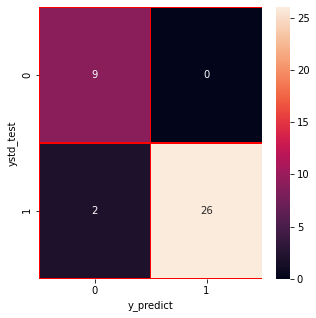

In [118]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmnb,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict")
plt.ylabel("ystd_test")
plt.show()